In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

In [2]:
episodes = []
tr = transition_model_factored_2()
hr_counts = init_hr_counts_2()
bp_counts = init_bp_counts_2()
o2_counts = init_o2_counts_2()
glu_counts = init_glu_counts_2()
state_counts = hr_counts, bp_counts, o2_counts, glu_counts

In [3]:
env = TrModelEnv(transition_model_factored_2(*state_counts))
model_training = train_dqn(env=env, nr_iter=10000, name="TS")
policies = [model_training.get_policy()]

In [4]:
nr_iterations = 1000
nr_episodes = 10

In [ ]:
for _ in range(nr_iterations):
    tr = transition_model_factored_2(*state_counts)
    env = TrModelEnv(tr)
    model_training = train_dqn(env=env, nr_iter=10000, name="TS_fac_2")
    policy = model_training.get_policy()
    policies.append(policy)
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = run_episode(policy)
        episodes.append(episode)
        state_counts = update_factored_counts_2(episode, *state_counts)

In [7]:
ts_eval = ThompsonSampling(len(episodes), episodes, "TS-fac_2-10", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "DQN with 10000 iterations", })
ts_eval.save()
ts_eval = ThompsonSampling.load("data/thompson_sampling/TS-fac_2-10.pkl")


'data/thompson_sampling/TS-fac_2-10.pkl'

In [9]:
len(ts_eval.episodes)


540

In [10]:
ts_eval.evaluate_policy(100000)

-0.56465

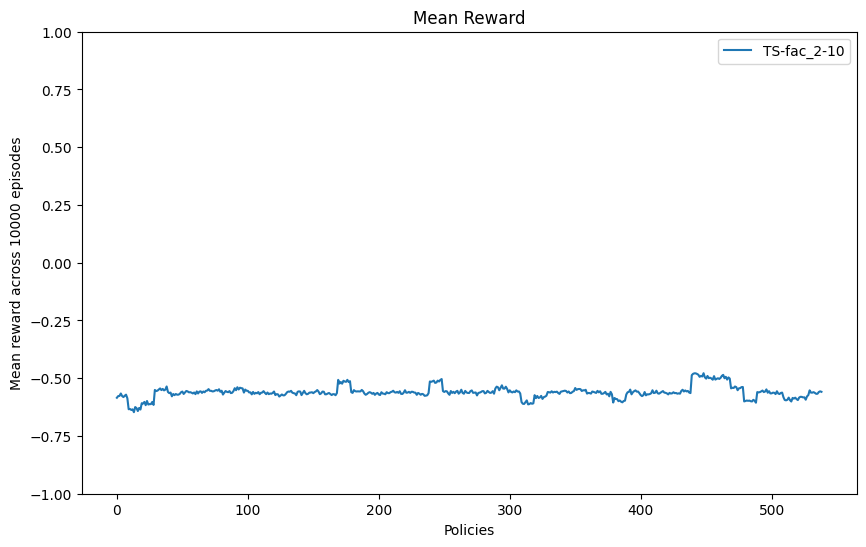

In [11]:
plot_mean_rewards([ts_eval], ts_eval.nr_iterations, 10000)